<a href="https://colab.research.google.com/github/juel-123/Online_Retail_Customer_Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Project Title : Online Retail Customer Segmentation*

Project type :Unsupervised ML

Contribution: Indiviual

#*Github link:*

#*Project Summary*

The aim of this ML project is to perform segmentation for an online retail business. Customer segmentation involves dividing a cusdtomer base into distinct groups on shared characteristics, behaviours,or preferences.By effectively segmenting customers, businesses can gain valuable insights and tailor their marketing strategies to specific customer Groups, leading to improved customer satisfaction and increased profitability.

Dataset : The project utilizes a dataset containing relevant information about the online retail customers. The dataset contains features such as Customer Demographics, Purchase history, frequency of purchases, monetary value of purchases, and other relevant variables that can help segmenting customers effectively.

Primary objective: The primary objective of this is to apply ML techniques to segment the online retail customers in to meaningful groups based on their purchasing behaviour and characteristics. This segmentation will help the business to better understanding it's customer base, identifying the pattern, trends and develop personalized marketing campaigns to target each segment.

#*Data Description*

Attribute information:



* Invoice : Invoce no ,Nominal , a 6-digit integral number assigned to each transcation. if this code starts with 'c' indicates a cancellation.

* StockCode : Product(item) code.Nominal , a 5-digit integral number uniquely assigned to each distinct product.  
*  Description: Product (item) name.Nominal


*  Quantity : The quantities of each product per transcation. Numeric.


* InvoiceDate : Invoice date and time. Numeric, the day and time when each transcation was generated.  
*  Unit price: Unit price, Product price on unit selling.

#*Importing libararies*

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# importing dataset
df = pd.read_csv('/content/drive/MyDrive/Online Retail.xlsx - Online Retail.csv')

In [52]:
# First five rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [53]:
# last five rows of the dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [54]:
# shape of the dataset
df.shape

(541909, 8)

#*Data Wrangling*

In [55]:
# Geting the information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Observations:


*   Datatype of InvoiceDate is object type need to convert into Datetime
*   If the InvoiceNo starts with C means it's cancellation. We need to drop this entries.
*   There are null values in CustomerID and Description.






In [56]:
# let's check the null values in the dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There are Null values in Description and CustomerID and We need to it.

In [57]:
# Dropping all missing values
df.dropna(inplace= True)

In [58]:
# Now geting the shape
df.shape

(406829, 8)

In [59]:
# Statistical analysis of the data
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000




*   Here we can see Quantity has negative value




In [60]:
# let's see the negative values in Quantity
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In [61]:
# Changing the datatype to string
df['InvoiceNo'] =df['InvoiceNo'].astype('str')

In [62]:
# InvoiceNO start's with C means Cancellation , we need to drop this
df= df[~df['InvoiceNo'].str.contains('C')]

In [63]:
#Checking unit price with values with 0
len(df[df['UnitPrice']==0])

40

In [64]:
# checking Unitprice value Greater than Zero
df= df[df['UnitPrice']>0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [65]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [66]:
df.shape

(397884, 8)

#*Feature Engineering*

In [67]:
# converting InvoiceDate to Datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%m/%d/%y %H:%M')

In [68]:
df['year']= df['InvoiceDate'].apply(lambda x: x.year)
df['month_num']= df['InvoiceDate'].apply(lambda x: x.month)
df['day_num']= df['InvoiceDate'].apply(lambda x: x.day)
df['hour']= df['InvoiceDate'].apply(lambda x: x.hour)
df['minute']= df['InvoiceDate'].apply(lambda x: x.minute)

In [69]:
# Exctracting month name and day name from InvoiceDate
df['Month'] = df['InvoiceDate'].dt.month_name()
df['day'] = df['InvoiceDate'].dt.day_name()

In [70]:
# Adding a new column
df['Amount']= df['Quantity']*df['UnitPrice']

In [71]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,day,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


#*EDA (Exploratory Data Analysis)*

In [72]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'day', 'Amount'],
      dtype='object')

###*Visualization on Description*

In [73]:
top_10_products = df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).head(10)
top_10_products

,Product_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1723
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1396
5,LUNCH BAG RED RETROSPOT,1316
6,SET OF 3 CAKE TINS PANTRY DESIGN,1159
7,LUNCH BAG BLACK SKULL.,1105
8,POSTAGE,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1068


Text(0.5, 1.0, 'Top_10_products')

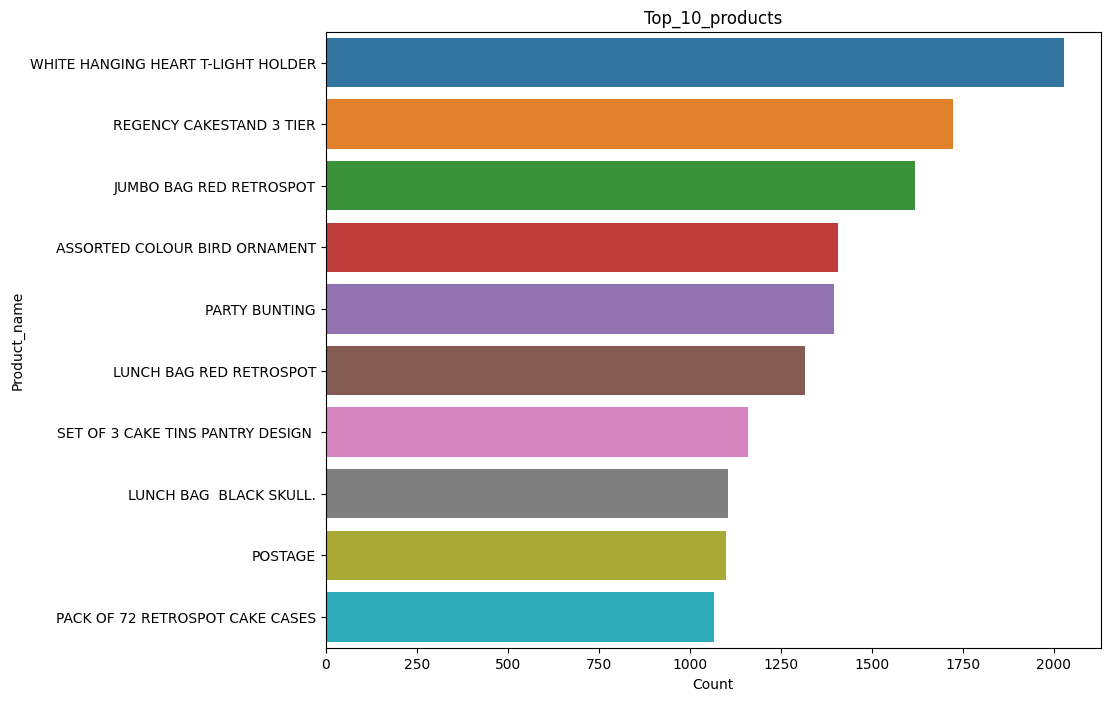

In [74]:
# plotting bar plot of top ten products
plt.figure(figsize=(10,8))
sns.barplot(x =top_10_products['Count'] ,y=top_10_products['Product_name'])
plt.title('Top_10_products')

From the visualization we can infer that product named WHITE HANGING HEART T-LIGHT HOLDER is most product by the customers.

In [75]:
bottom_10_products = df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).tail(10)
bottom_10_products

,Product_name,Count
3867,BLUE FELT HANGING HEART WITH FLOWER,1
3868,GLASS CAKE COVER AND PLATE,1
3869,CRACKED GLAZE EARRINGS RED,1
3870,SCALLOP SHELL SOAP DISH,1
3871,NECKLACE+BRACELET SET PINK DAISY,1
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


Text(0.5, 1.0, 'Bottom_10_products')

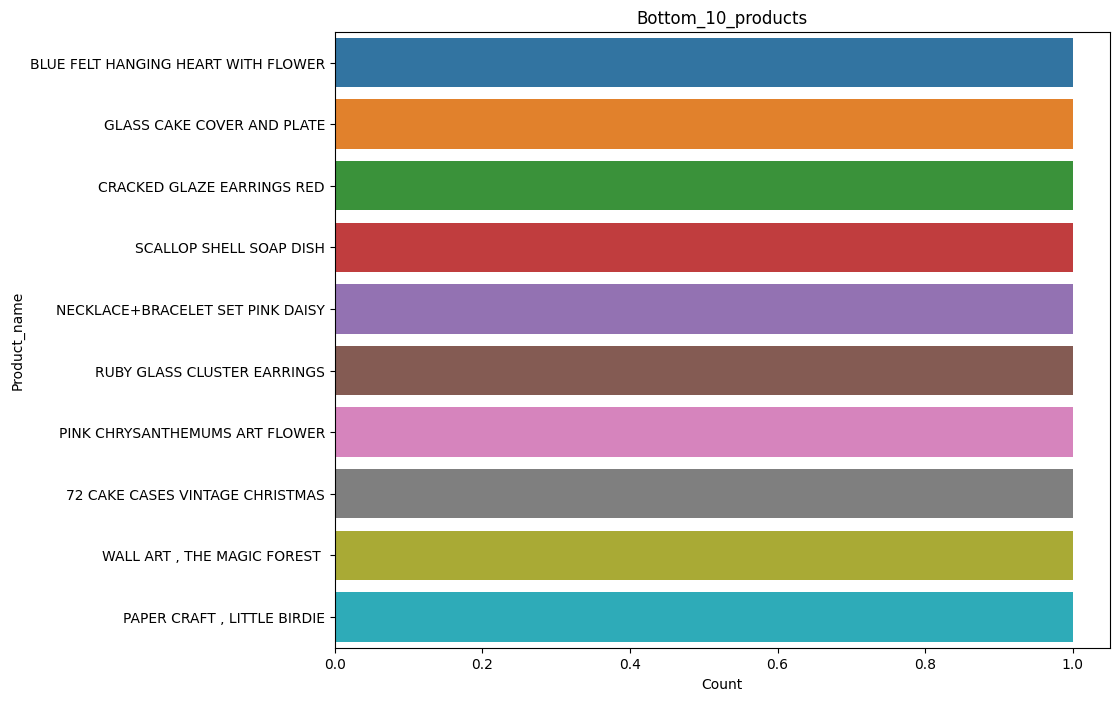

In [76]:
# plotting bar plot of top ten products
plt.figure(figsize=(10,8))
sns.barplot(x =bottom_10_products['Count'] ,y=bottom_10_products['Product_name'])
plt.title('Bottom_10_products')

###*Visualization on StockCode*

In [77]:
top_10_StockCodes = df['StockCode'].value_counts().reset_index().rename(columns={'index':'StockCode','StockCode':'Count'}).head(10)
top_10_StockCodes

,StockCode,Count
0,85123A,2035
1,22423,1723
2,85099B,1618
3,84879,1408
4,47566,1396
5,20725,1317
6,22720,1159
7,20727,1105
8,POST,1099
9,23203,1098


Text(0.5, 1.0, 'Top_10_StockCodes')

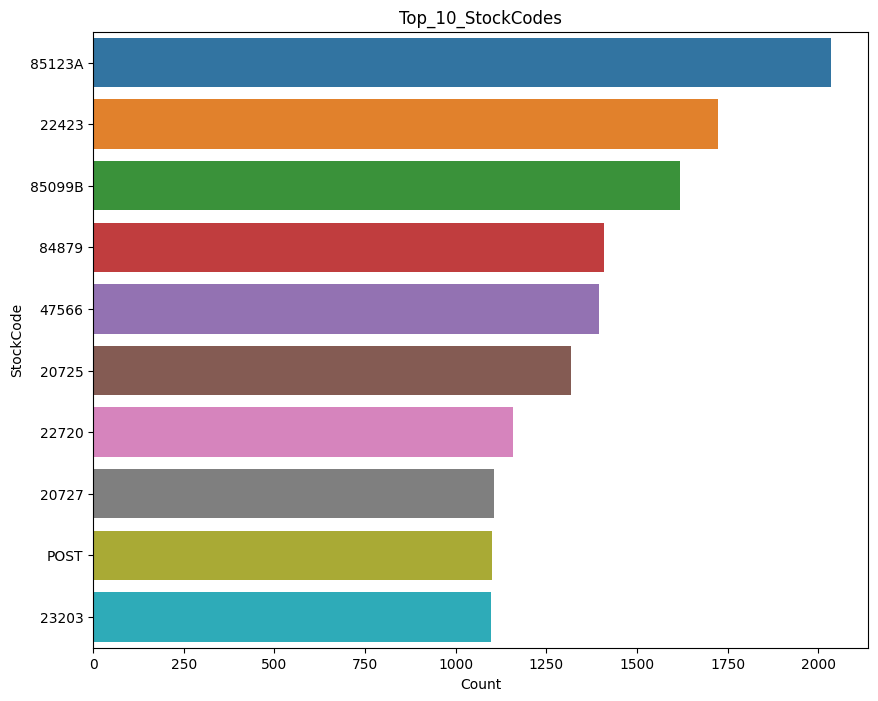

In [78]:
# plotting bar plot of top ten products
plt.figure(figsize=(10,8))
sns.barplot(x =top_10_StockCodes['Count'] ,y=top_10_StockCodes['StockCode'])
plt.title('Top_10_StockCodes')

From the visualization we can infer that the Stockcode of 85123A	has the highest selling.

###*Visualization on Customers*

In [79]:
top_10_customers = df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Products_puchasing_count'}).head(10)
top_10_customers

,CustomerID,Products_puchasing_count
0,17841.0,7847
1,14911.0,5675
2,14096.0,5111
3,12748.0,4595
4,14606.0,2700
5,15311.0,2379
6,14646.0,2076
7,13089.0,1818
8,13263.0,1677
9,14298.0,1637


Text(0.5, 1.0, 'Top_10_customers')

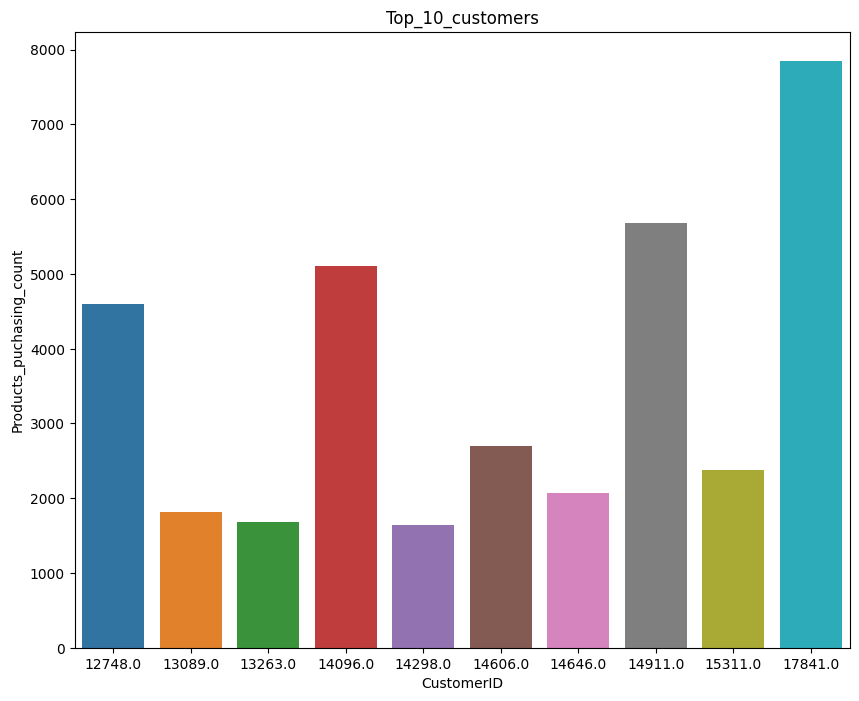

In [80]:
# Customers purchased highest no of products
plt.figure(figsize=(10,8))
sns.barplot(y =top_10_customers['Products_puchasing_count'] ,x=top_10_customers['CustomerID'])
plt.title('Top_10_customers')

CustomerID- 17841 has Purchased the highest number of Products

###*Visualization on Country*

In [81]:
top_10_countries = df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Customer_count'}).head(10)
top_10_countries

,Country,Customer_count
0,United Kingdom,354321
1,Germany,9040
2,France,8341
3,EIRE,7236
4,Spain,2484
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1841
8,Portugal,1462
9,Australia,1182


Text(0.5, 1.0, 'top_10_countries')

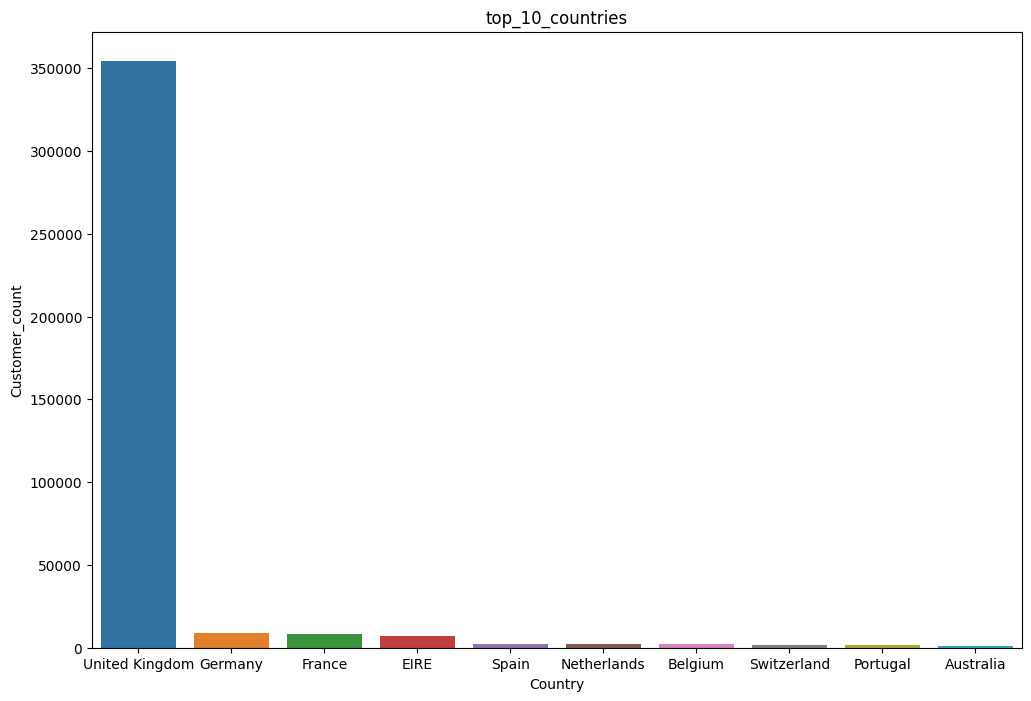

In [82]:
# Visualizing the countries where Maximum selling is done
plt.figure(figsize=(12,8))
sns.barplot(y =top_10_countries['Customer_count'] ,x=top_10_countries['Country'])
plt.title('top_10_countries')



*   Customers from United Kingdom has highest number of customers.
*   Customers from Spain , Netherlands, Belgium has very close number of customers.



###*Visualization on Month*

In [83]:
sales_in_month = df['Month'].value_counts().reset_index().rename(columns={'index':'Month','Month':'sales_count'}).head(10)
sales_in_month

,Month,sales_count
0,November,64531
1,October,49554
2,December,43461
3,September,40028
4,May,28320
5,June,27185
6,March,27175
7,August,27007
8,July,26825
9,April,22642


Text(0.5, 1.0, 'sales_in_month')

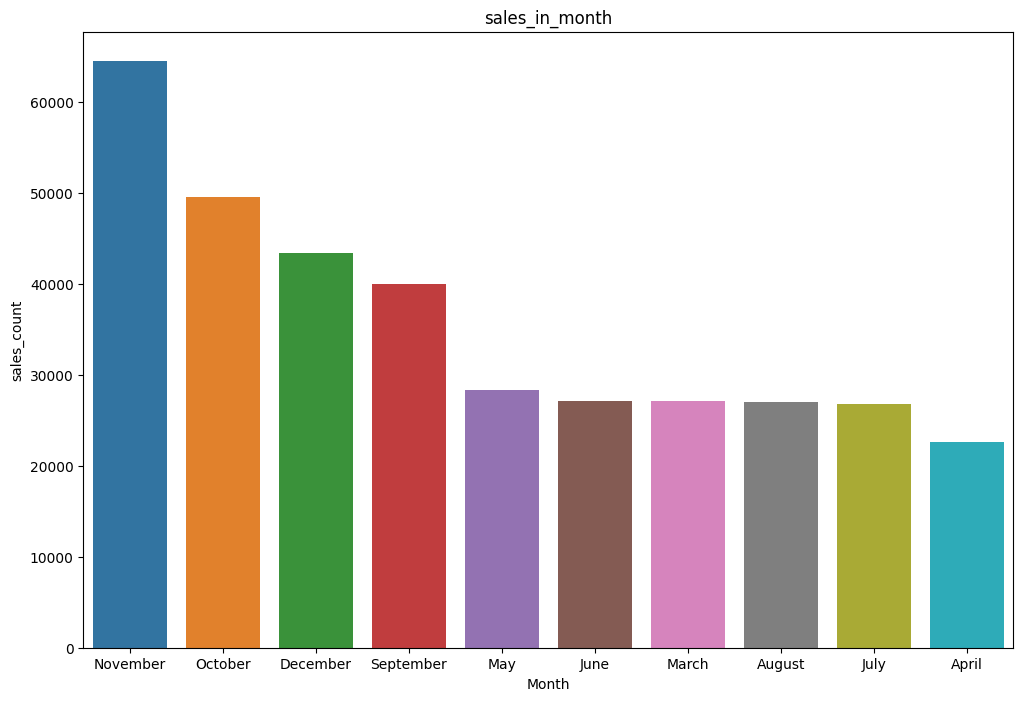

In [84]:
# Visualization on sales in a month
plt.figure(figsize=(12,8))
sns.barplot(y =sales_in_month['sales_count'] ,x=sales_in_month['Month'])
plt.title('sales_in_month')

The sales has been more in the month of November

In [85]:
# sales on different days
sales_on_day_basis= df['day'].value_counts().reset_index().rename(columns={'index':'day','day':'sales_count'})
sales_on_day_basis

,day,sales_count
0,Thursday,80035
1,Wednesday,68885
2,Tuesday,66473
3,Monday,64893
4,Sunday,62773
5,Friday,54825


Text(0.5, 1.0, 'sales_on_day_basis')

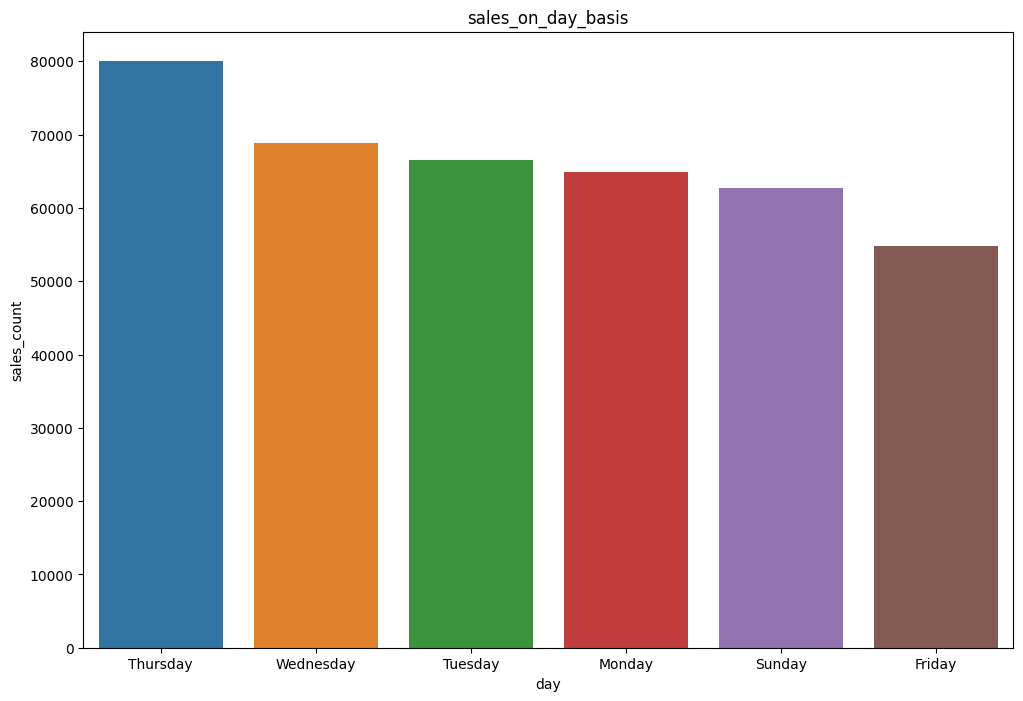

In [86]:
# visualizing sales on different days
plt.figure(figsize=(12,8))
sns.barplot(y =sales_on_day_basis['sales_count'] ,x=sales_on_day_basis['day'])
plt.title('sales_on_day_basis')


Among all days , the selling was done more in Thrushday

#*Model Building*

##*What is RFM?*

RFM(Recency, Frequency, Monetary) analysis is widely used Customer segmentation technique in marketing and analytics.It helps businesses understand and categorize their customers based on three key factors.


*   Recency: How recently they made purchase.
*   Frequency: How frequently they make Purchase.
*   Monetary : How much they spend.

RMF analysis enables businesses to identify and target different customer segment with customized marketing approach.






###*Why it is Needed?*

RFM analysis is marketing framework that is used to understand and analyze customer behaivour based on the above three factors Recency, Frequency and Monetary.

The RFM analysis will help the business to segement their customer base into different homogeneous groups so they can engage with each group with different market strategies.